<a href="https://colab.research.google.com/github/gitsadap/RFforVIs/blob/main/VIs_randomForrestLinearEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training & Validate

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [ ]:
df = pd.read_csv("training-dataset.csv")

In [ ]:
X=df[['NDVI', 'NDRE', 'TVI', 'GNDVI']]
y=df['Carbon-stock']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

NameError: name 'X' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
param_grid = {
  'ntree_values ': [50, 100,200,300,400,500,1000],  # Ntree values from 50 to 1000  (defalut 200)
  'mtry_values ': np.arange(1, 26)  # Mtry values from 1 to 25 with interval 1 (defalut 20)
}

all_rmse = []

# Loop through each Ntree value
for n in ntree_values:
  # Define a temporary parameter grid for this Ntree value
  param_grid = {
    'n_estimators': [n],  # Fix n_estimators for this loop
    'max_features': mtry_values  # Explore Mtry values
  }

  # Create a Random Forest Regressor
  rf_model = RandomForestRegressor()

  # Define the RandomizedSearchCV object
  random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                     scoring='neg_mean_squared_error', n_iter=5, cv=3)

  # Fit the model with randomized search
  random_search.fit(X, y)

  # Get the best model for this Ntree
  best_model = random_search.best_estimator_

  # Get the best RMSE for this Ntree
  best_rmse = mean_squared_error(y, random_search.best_estimator_.predict(X))**0.5

  # Store Ntree, Mtry (from best model), and RMSE in a dictionary
  result = {'Ntree': n, 'Mtry': best_model.max_features, 'RMSE': best_rmse}
  all_rmse.append(result)

# Create a Pandas DataFrame from all_rmse list
df_results = pd.DataFrame(all_rmse)

# Print the DataFrame with all Ntree, Mtry, and RMSE combinations
print(df_results.to_string())

   Ntree  Mtry         RMSE
0    100     6  1685.902515
1    200    25  1596.411436
2    300     6  1695.947502
3    400    20  1585.409351
4    500     5  1637.821872
5    600    23  1693.865904
6    700    18  1601.571907
7    800     1  1632.681742
8    900     1  1599.889507
9   1000    20  1735.444762


R-squared: 0.956657044658695
Mean Absolute Error: 1056.1158587354114
Root Mean Squared Error: 1550.996303753955
Feature: NDVI, Importance: 0.1874
Feature: NDRE, Importance: 0.1806
Feature: TVI, Importance: 0.4024
Feature: GNDVI, Importance: 0.2296


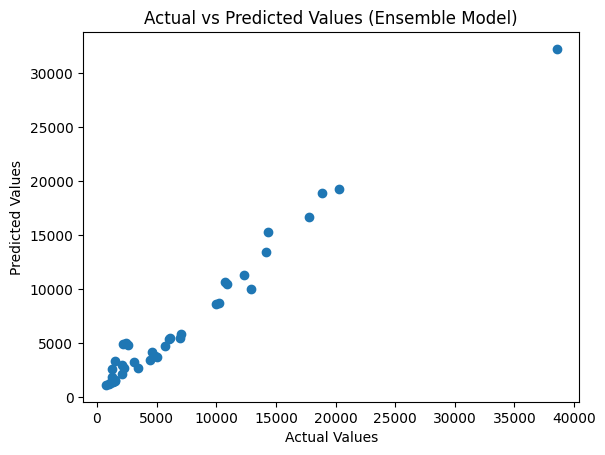

In [ ]:
# Define base learners (linear regression models)
def get_base_learners(n_estimators):
  base_learners = []
  for _ in range(n_estimators):
    base_learners.append(LinearRegression())
  return base_learners

# Ensemble model with Random Forest
def ensemble_model(X, y, n_estimators=400):
  base_learners = get_base_learners(n_estimators)
  ensemble = RandomForestRegressor()
  ensemble.fit(X, y)
  return ensemble

# Train the ensemble model
ensemble_model = ensemble_model(X, y)

# New ensemble equation (symbolic representation)
# This represents the average prediction from all the linear models in the forest
# Make predictions
y_pred = ensemble_model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print results

print("R-squared:", r2)

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Ensemble Model)")

mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y, y_pred, squared=False)  # Avoids squaring the error
print(f"Root Mean Squared Error: {rmse}")

feature_importances = ensemble_model.feature_importances_
feature_names = X.columns  # Assuming column names are available

# Print feature importances (relative contribution to predictions)
for feature, importance in zip(feature_names, feature_importances):
  print(f"Feature: {feature}, Importance: {importance:.4f}")


# the line equation:
ensemble_model.score(X,y)
plt.show()


Utilizing (TVI, GNDVI, NDVI, NDRE ensembled)

In [ ]:
import joblib
joblib.dump(model, 'ensembleVIs.joblib')

In [ ]:
loaded_model = joblib.load('ensembleVIs.joblib')

Preparing a VIs file (TVI, GNDVI, NDVI, and NDRE) in csv format for ensembling

In [ ]:
new_data = pd.read_csv("VIs.csv")

# Make predictions
predictions = model.predict(new_data)
print(predictions)

#export
import csv

# Sample data (replace with your actual data)
data = predictions

# Specify the CSV file path
filename = "ensemble-RF.csv"

# Open the CSV file in write mode
with open(filename, "w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile)

    # Convert the Pandas Series to a list of lists for writerows
    data_list = [[x] for x in data]  # Each inner list represents a row

    # Write the data to the CSV file
    csv_writer.writerows(data_list)  # Use writerows for multiple rows

print("Data exported to", filename)